In [1]:
# importing libraries


In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier, AdaBoostClassifier
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split,cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



In [3]:
# loading dataset and displaying 

In [4]:
df=pd.read_csv('train.csv')
df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [5]:
df.shape #shape of the dataset

(39161, 19)

In [6]:
df.info() #info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [7]:
df.describe() #dataset descriptionj

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [8]:
df.isna().sum() #check for null values

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [9]:
df.nunique() #check for unique values in each columns

id                      39161
created_at                365
campaign_var_1             16
campaign_var_2             15
products_purchased          4
signup_date              1800
user_activity_var_1         4
user_activity_var_2         2
user_activity_var_3         2
user_activity_var_4         2
user_activity_var_5         3
user_activity_var_6         4
user_activity_var_7         3
user_activity_var_8         3
user_activity_var_9         2
user_activity_var_10        2
user_activity_var_11        5
user_activity_var_12        2
buy                         2
dtype: int64

<AxesSubplot:xlabel='products_purchased', ylabel='count'>

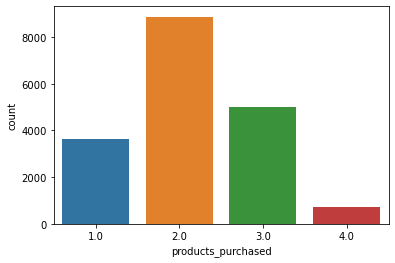

In [10]:
sns.countplot(x=df['products_purchased'], data=df) #countplot for products purchased

In [11]:
df['products_purchased'].fillna(1,inplace=True) #filling missing values in product purchased with minimum number


<AxesSubplot:xlabel='products_purchased', ylabel='count'>

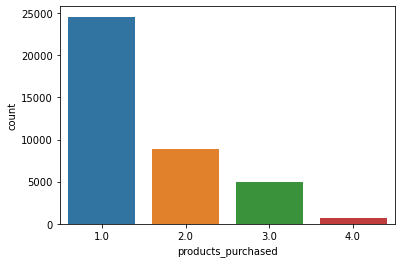

In [12]:
sns.countplot(x=df['products_purchased'], data=df) #count plot after filling missing values

In [13]:
df['signup_date'].fillna(df['signup_date'].mode()[0],inplace=True) # filling the missing values in signup date with most number occured
df.isna().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
dtype: int64

<AxesSubplot:xlabel='campaign_var_1', ylabel='count'>

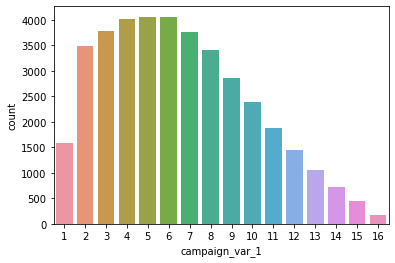

In [14]:
sns.countplot(x=df['campaign_var_1'], data=df) #count plot for campaign_var_1

<AxesSubplot:xlabel='campaign_var_2', ylabel='count'>

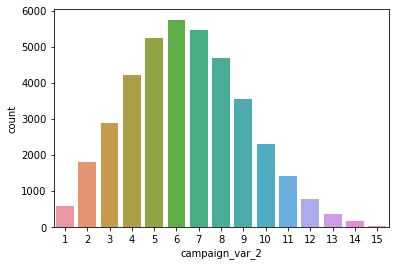

In [15]:
sns.countplot(x=df['campaign_var_2'], data=df) #count plot for campaign_var_2

<AxesSubplot:xlabel='user_activity_var_1', ylabel='count'>

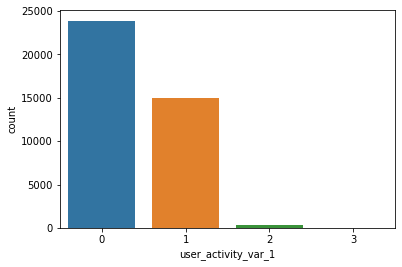

In [16]:
sns.countplot(x=df['user_activity_var_1'], data=df) #count plot for user_activity_var_1

<AxesSubplot:xlabel='user_activity_var_2', ylabel='count'>

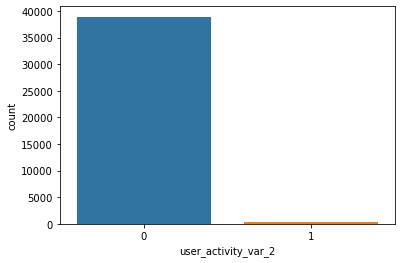

In [17]:
sns.countplot(x=df['user_activity_var_2'], data=df) #count plot for user_activity_var_2

<AxesSubplot:xlabel='user_activity_var_3', ylabel='count'>

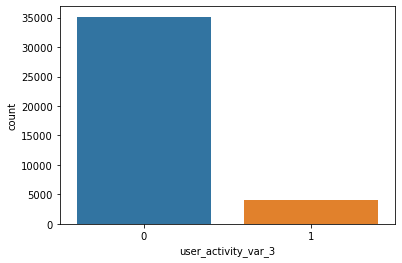

In [18]:
sns.countplot(x=df['user_activity_var_3'], data=df) #count plot for user_activity_var_3

<AxesSubplot:xlabel='user_activity_var_4', ylabel='count'>

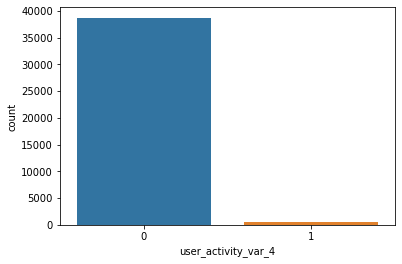

In [19]:
sns.countplot(x=df['user_activity_var_4'], data=df) #count plot for user_activity_var_4

0    33244
1     5901
2       16
Name: user_activity_var_5, dtype: int64


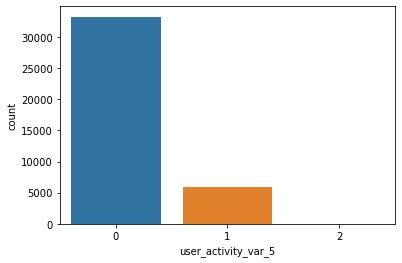

In [20]:
sns.countplot(x=df['user_activity_var_5'], data=df) #count plot for user_activity_var_5
print(df['user_activity_var_5'].value_counts()) 

0    20777
1    17209
2     1160
3       15
Name: user_activity_var_6, dtype: int64


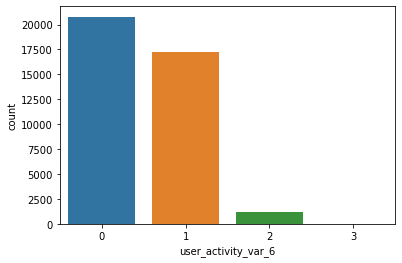

In [21]:
sns.countplot(x=df['user_activity_var_6'], data=df) #count plot for user_activity_var_6
print(df['user_activity_var_6'].value_counts())

0    28001
1    11096
2       64
Name: user_activity_var_7, dtype: int64


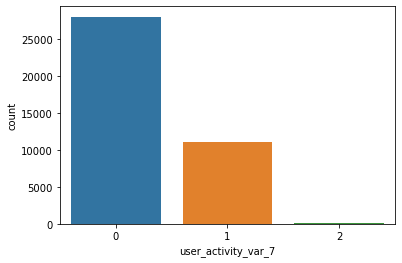

In [22]:
sns.countplot(x=df['user_activity_var_7'], data=df) #count plot for user_activity_var_7
print(df['user_activity_var_7'].value_counts())

0    32333
1     6825
2        3
Name: user_activity_var_8, dtype: int64


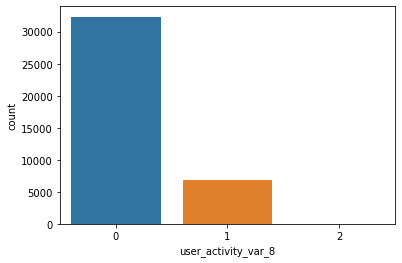

In [23]:
sns.countplot(x=df['user_activity_var_8'], data=df) #count plot for user_activity_var_8
print(df['user_activity_var_8'].value_counts())

0    38713
1      448
Name: user_activity_var_9, dtype: int64


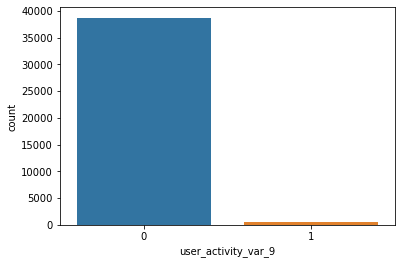

In [24]:
sns.countplot(x=df['user_activity_var_9'], data=df) #count plot for user_activity_var_9
print(df['user_activity_var_9'].value_counts())

0    39146
1       15
Name: user_activity_var_10, dtype: int64


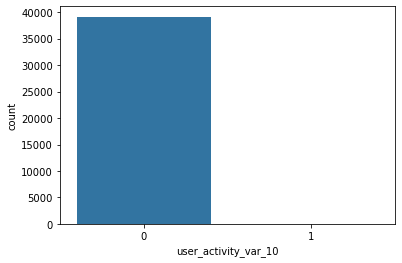

In [25]:
sns.countplot(x=df['user_activity_var_10'], data=df) #count plot for user_activity_var_10
print(df['user_activity_var_10'].value_counts())

0    30859
1     8055
2      223
3       23
4        1
Name: user_activity_var_11, dtype: int64


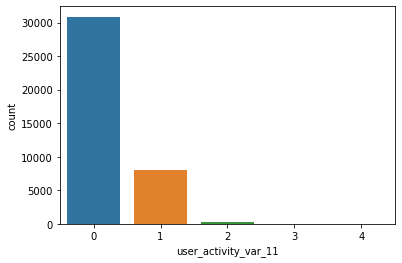

In [26]:
sns.countplot(x=df['user_activity_var_11'], data=df) #count plot for user_activity_var_11
print(df['user_activity_var_11'].value_counts())

0    39139
1       22
Name: user_activity_var_12, dtype: int64


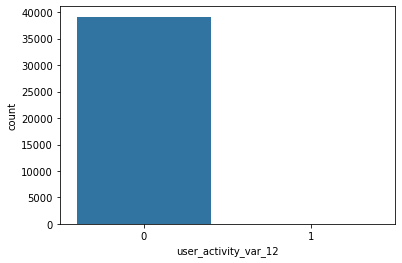

In [27]:
sns.countplot(x=df['user_activity_var_12'], data=df) #count plot for user_activity_var_12
print(df['user_activity_var_12'].value_counts())

0    37163
1     1998
Name: buy, dtype: int64


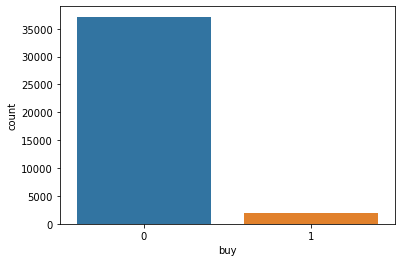

In [28]:
sns.countplot(x=df['buy'], data=df)
print(df['buy'].value_counts())

In [29]:
#correlation graph

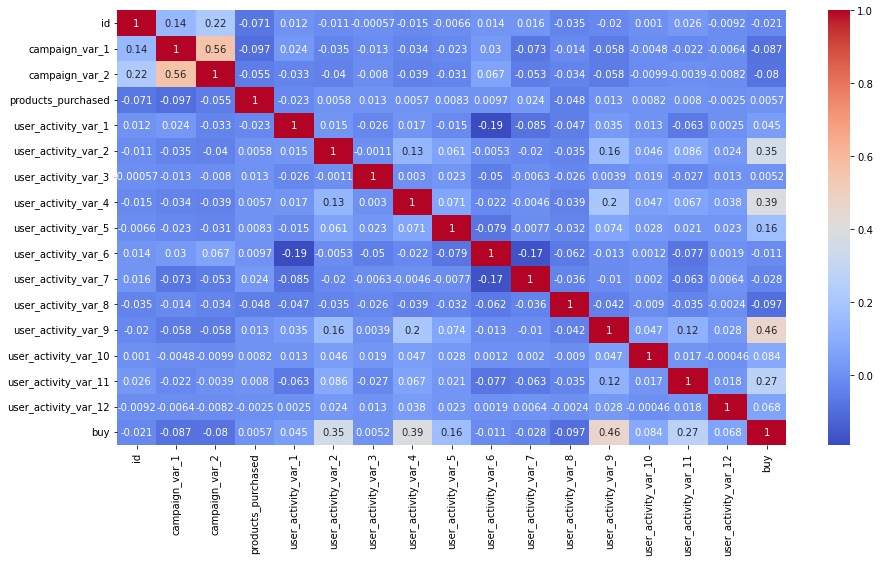

In [30]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

Text(0.5, 1.0, 'campaign_var_1')

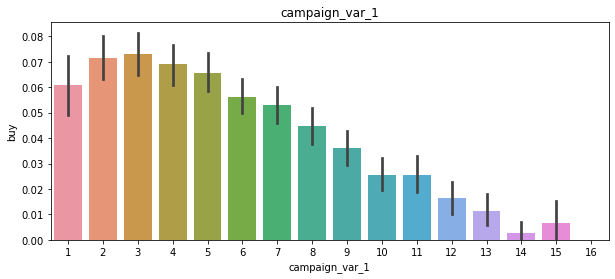

In [31]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='campaign_var_1',y='buy',data=df)
plt.title("campaign_var_1")

Text(0.5, 1.0, 'campaign_var_1')

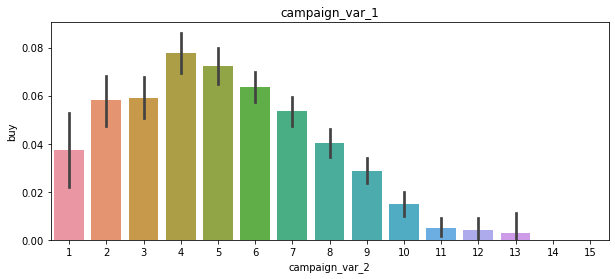

In [32]:
plt.figure(figsize=(10,4)) 
sns.barplot(x='campaign_var_2',y='buy',data=df)
plt.title("campaign_var_1")

Text(0.5, 1.0, 'user_activity_var_4')

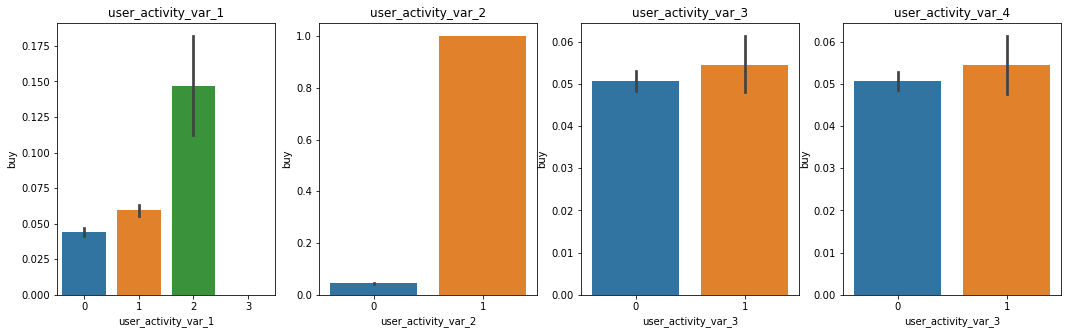

In [33]:
#bar plots shows the user activity against buy
plt.figure(figsize=(18,5)) 
plt.subplot(141)
sns.barplot(x='user_activity_var_1',y='buy',data=df)
plt.title("user_activity_var_1")

plt.subplot(142)
sns.barplot(x='user_activity_var_2',y='buy',data=df)
plt.title("user_activity_var_2")

plt.subplot(143)
sns.barplot(x='user_activity_var_3',y='buy',data=df)
plt.title("user_activity_var_3")

plt.subplot(144)
sns.barplot(x='user_activity_var_3',y='buy',data=df)
plt.title("user_activity_var_4")


Text(0.5, 1.0, 'user_activity_var_9')

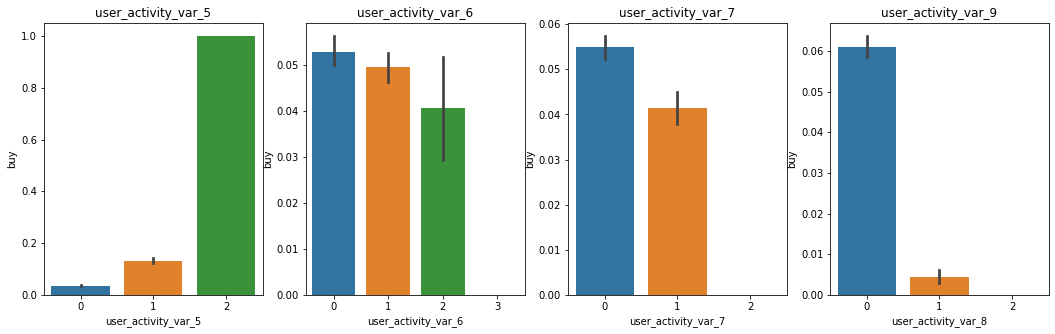

In [34]:
plt.figure(figsize=(18,5)) 
plt.subplot(141)
sns.barplot(x='user_activity_var_5',y='buy',data=df)
plt.title("user_activity_var_5")

plt.subplot(142)
sns.barplot(x='user_activity_var_6',y='buy',data=df)
plt.title("user_activity_var_6")

plt.subplot(143)
sns.barplot(x='user_activity_var_7',y='buy',data=df)
plt.title("user_activity_var_7")

plt.subplot(144)
sns.barplot(x='user_activity_var_8',y='buy',data=df)
plt.title("user_activity_var_9")

Text(0.5, 1.0, 'user_activity_var_12')

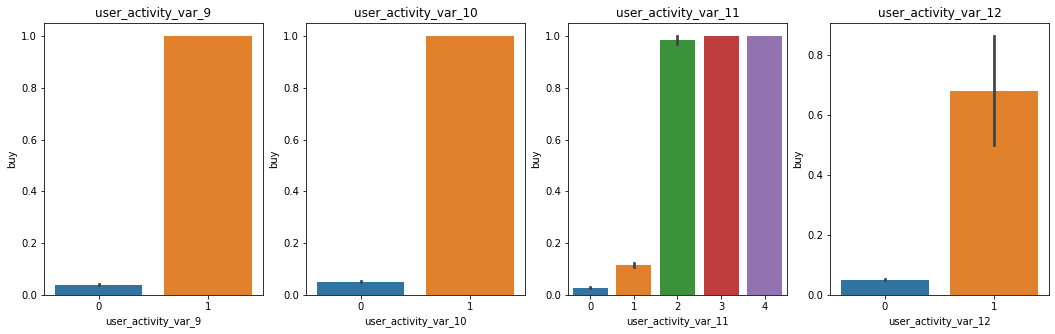

In [35]:
plt.figure(figsize=(18,5)) 
plt.subplot(141)
sns.barplot(x='user_activity_var_9',y='buy',data=df)
plt.title("user_activity_var_9")

plt.subplot(142)
sns.barplot(x='user_activity_var_10',y='buy',data=df)
plt.title("user_activity_var_10")

plt.subplot(143)
sns.barplot(x='user_activity_var_11',y='buy',data=df)
plt.title("user_activity_var_11")

plt.subplot(144)
sns.barplot(x='user_activity_var_12',y='buy',data=df)
plt.title("user_activity_var_12")

In [36]:
# created_at , signup_date data type
print(df['created_at'].dtype)


object


In [37]:
# convert object values to datetime values

In [38]:
df['createdDate'] = pd.to_datetime(df['created_at'])
df['signupDate'] = pd.to_datetime(df['signup_date'])

In [39]:
# created_at , signup_date
print(df['createdDate'].dtype)

datetime64[ns]


In [40]:
# extract date, year, month from date tiem value and store in another column

In [41]:
df['cDate'] = df['createdDate'].dt.day
df['cyear'] = df['createdDate'].dt.year
df['cmonth'] = df['createdDate'].dt.month

In [42]:
df['signDate'] = df['signupDate'].dt.day
df['signyear'] = df['signupDate'].dt.year
df['signmonth'] = df['signupDate'].dt.month

In [43]:
df.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy', 'createdDate',
       'signupDate', 'cDate', 'cyear', 'cmonth', 'signDate', 'signyear',
       'signmonth'],
      dtype='object')

In [44]:
df2=df.drop(['created_at','signup_date','createdDate','signupDate'],axis=1) #remove duplicate columns

In [45]:
df2.columns

Index(['id', 'campaign_var_1', 'campaign_var_2', 'products_purchased',
       'user_activity_var_1', 'user_activity_var_2', 'user_activity_var_3',
       'user_activity_var_4', 'user_activity_var_5', 'user_activity_var_6',
       'user_activity_var_7', 'user_activity_var_8', 'user_activity_var_9',
       'user_activity_var_10', 'user_activity_var_11', 'user_activity_var_12',
       'buy', 'cDate', 'cyear', 'cmonth', 'signDate', 'signyear', 'signmonth'],
      dtype='object')

In [46]:
X = df2.drop(['id','buy'],axis=1) #splitting the data as X,y . remove id, buy from X to train it

In [47]:
df2.head()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,...,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,cDate,cyear,cmonth,signDate,signyear,signmonth
0,1,1,2,2.0,0,0,0,0,0,0,...,0,0,0,0,1,2021,1,24,2020,9
1,2,2,1,2.0,1,0,1,0,0,0,...,0,0,0,0,1,2021,1,19,2020,9
2,3,9,3,3.0,1,0,0,0,0,0,...,0,0,0,0,1,2021,1,11,2021,8
3,4,6,7,2.0,0,0,0,0,0,0,...,0,0,0,0,1,2021,1,4,2017,10
4,5,4,6,1.0,0,0,0,0,0,0,...,0,1,0,0,1,2021,1,8,2020,6


##### standardization

In [48]:
 #standardizing the data
scale=preprocessing.StandardScaler()

for column in X.columns:
    get_column = X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    X[column] = scale.fit_transform(reshaped_vals)
    
X

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,cDate,cyear,cmonth,signDate,signyear,signmonth
0,-1.590548,-1.703251,0.589376,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,1.565209,...,-0.107575,-0.019575,-0.507352,-0.023709,-1.709313,0.0,-2.160435,1.060404,-0.582577,0.828875
1,-1.302604,-2.085768,0.589376,1.178167,-0.082227,2.953745,-0.107696,-0.42122,-0.895506,1.565209,...,-0.107575,-0.019575,-0.507352,-0.023709,-1.709313,0.0,-2.160435,0.340386,-0.582577,0.828875
2,0.713003,-1.320734,1.864685,1.178167,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,-0.628840,...,-0.107575,-0.019575,-0.507352,-0.023709,-1.709313,0.0,-2.160435,-0.811644,0.482019,0.472810
3,-0.150828,0.209334,0.589376,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,-0.628840,...,-0.107575,-0.019575,-0.507352,-0.023709,-1.709313,0.0,-2.160435,-1.819669,-3.776363,1.184940
4,-0.726716,-0.173183,-0.685933,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,1.565209,...,-0.107575,-0.019575,1.809936,-0.023709,-1.709313,0.0,-2.160435,-1.243655,-0.582577,-0.239319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,1.288891,1.739402,0.589376,1.178167,-0.082227,-0.338553,-0.107696,2.35906,0.896100,1.565209,...,-0.107575,-0.019575,-0.507352,-0.023709,1.705267,0.0,1.343528,0.340386,-3.776363,1.184940
39157,-1.014660,0.974368,1.864685,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,-0.895506,-0.628840,...,-0.107575,-0.019575,-0.507352,-0.023709,1.705267,0.0,1.343528,0.196382,0.482019,0.116746
39158,0.425059,0.209334,0.589376,1.178167,-0.082227,-0.338553,-0.107696,2.35906,-0.895506,1.565209,...,-0.107575,-0.019575,-0.507352,-0.023709,1.705267,0.0,1.343528,0.196382,0.482019,0.116746
39159,0.137115,2.121919,0.589376,-0.785745,-0.082227,-0.338553,-0.107696,-0.42122,0.896100,-0.628840,...,-0.107575,-0.019575,1.809936,-0.023709,1.705267,0.0,1.343528,0.196382,0.482019,0.116746


#### Normalization

In [49]:
minmaxscale=preprocessing.MinMaxScaler() #normalizing the data
for column in X.columns:
    get_column = X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    X[column] = minmaxscale.fit_transform(reshaped_vals)
    
X

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,cDate,cyear,cmonth,signDate,signyear,signmonth
0,0.000000,0.071429,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.5,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.766667,0.714286,0.727273
1,0.066667,0.000000,0.333333,0.333333,0.0,1.0,0.0,0.0,0.000000,0.5,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.600000,0.714286,0.727273
2,0.533333,0.142857,0.666667,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.333333,0.857143,0.636364
3,0.333333,0.428571,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.100000,0.285714,0.818182
4,0.200000,0.357143,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.5,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.233333,0.714286,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,0.666667,0.714286,0.333333,0.333333,0.0,0.0,0.0,0.5,0.333333,0.5,...,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.600000,0.285714,0.818182
39157,0.133333,0.571429,0.666667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.566667,0.857143,0.545455
39158,0.466667,0.428571,0.333333,0.333333,0.0,0.0,0.0,0.5,0.000000,0.5,...,0.0,0.0,0.00,0.0,1.0,0.0,1.0,0.566667,0.857143,0.545455
39159,0.400000,0.785714,0.333333,0.000000,0.0,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.25,0.0,1.0,0.0,1.0,0.566667,0.857143,0.545455


In [50]:
y=df2['buy'] #split data
X=X

In [51]:
#Split the Data into Training and Testing sets with test size as 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31328, 21) (7833, 21) (31328,) (7833,)


In [52]:
print('Train cases shape')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases shape')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)
Scores={}

Train cases shape
X_train shape:  (31328, 21)
y_train shape:  (31328,)

Test cases shape
X_test shape:  (7833, 21)
y_test shape:  (7833,)


#### decision tree classifier

In [53]:
dt_model=DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)
y_pred_dt=dt_model.predict(X_test)

print("ACCURACY of the model: ", accuracy_score(y_test, y_pred_dt))
print('Classification Report for Decision Tree\n\n', classification_report(y_test, y_pred_dt))
dt_model_f1 = f1_score(y_test, y_pred_dt,average='macro')*100 # F1 score
print('F1 Score is :', dt_model_f1)
Scores['decision_tree'] =dt_model_f1

ACCURACY of the model:  0.9521256223669092
Classification Report for Decision Tree

               precision    recall  f1-score   support

           0       0.98      0.97      0.97      7430
           1       0.53      0.63      0.57       403

    accuracy                           0.95      7833
   macro avg       0.75      0.80      0.77      7833
weighted avg       0.96      0.95      0.95      7833

F1 Score is : 77.40093629885673


#### Random Forest classifier

In [54]:
rf_clf = RandomForestClassifier(n_estimators = 100,random_state=0,criterion='entropy') 
rf_clf.fit(X_train, y_train)
 
# performing predictions on the dataset
y_pred_rf = rf_clf.predict(X_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred_rf))
print('Classification Report RandomForest Classifier\n\n', classification_report(y_test, y_pred_rf))
clf_model_f1 = f1_score(y_test, y_pred_rf,average='macro')*100 # F1 score
print('F1 Score is :', clf_model_f1)
Scores['random_forest'] =clf_model_f1

ACCURACY of the model:  0.9765096387080301
Classification Report RandomForest Classifier

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.93      0.59      0.72       403

    accuracy                           0.98      7833
   macro avg       0.96      0.79      0.85      7833
weighted avg       0.98      0.98      0.97      7833

F1 Score is : 85.36268503924214


#### Logistic regression

In [55]:
logic_model=LogisticRegression()
logic_model.fit(X_train,y_train)
y_pred_lo=logic_model.predict(X_test)

print("ACCURACY of the model: ", accuracy_score(y_test, y_pred_lo))
print('Classification Report LogisticRegression Classifier\n\n', classification_report(y_test, y_pred_lo))
logic_model_f1 = f1_score(y_test, y_pred_lo,average='macro')*100 # F1 score
print('F1 Score is :', logic_model_f1)
Scores['logistic'] =logic_model_f1

ACCURACY of the model:  0.9754883186518575
Classification Report LogisticRegression Classifier

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.95      0.55      0.70       403

    accuracy                           0.98      7833
   macro avg       0.96      0.78      0.84      7833
weighted avg       0.97      0.98      0.97      7833

F1 Score is : 84.31417049720353


#### KNN CLassifier

In [56]:
# create object of KNN Clasifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30, metric='manhattan', n_jobs=-1)
knn_clf.fit(X_train, y_train)

y_pred_knn = knn_clf.predict(X_test)

# Classification Report
print('Classification Report for KNN\n\n', classification_report(y_test, y_pred_knn))
# F1 Score
knn_clf_f1 = f1_score(y_test, y_pred_knn,average='macro')*100
print('F1 Score is :', knn_clf_f1)
Scores['KNN'] =knn_clf_f1

Classification Report for KNN

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7430
           1       0.91      0.42      0.58       403

    accuracy                           0.97      7833
   macro avg       0.94      0.71      0.78      7833
weighted avg       0.97      0.97      0.96      7833

F1 Score is : 78.16055151076355


#### Gradient Booster Classifier

In [57]:
# create object of Gradient Boosting Clasifier
gb_clf = GradientBoostingClassifier(n_estimators=200, criterion='friedman_mse', max_depth=8, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Classification Report
print('Classification Report for Gradient Boosting\n\n', classification_report(y_test, y_pred_gb))

gb_clf_f1 = f1_score(y_test, y_pred_gb,average='macro')*100 #F1 SCORE
print('F1 Score is :', gb_clf_f1)
Scores['gradient_boost'] =gb_clf_f1

Classification Report for Gradient Boosting

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7430
           1       0.89      0.60      0.72       403

    accuracy                           0.98      7833
   macro avg       0.94      0.80      0.85      7833
weighted avg       0.97      0.98      0.97      7833

F1 Score is : 85.27137321903037


#### ADA BOOST CLASSIFIER

In [58]:
# create object of AdaBoost Clasifier

adb_clf = AdaBoostClassifier(n_estimators=300, learning_rate=0.1, algorithm='SAMME', random_state=42)
adb_clf.fit(X_train, y_train)
y_pred_ada = adb_clf.predict(X_test)
# Classification Report
print('Classification Report for AdaBoost\n\n', classification_report(y_test, y_pred_ada))

adb_clf_f1 = f1_score(y_test, y_pred_ada,average='macro')*100
# F1 Score 
print('F1 Score is :', adb_clf_f1)
Scores['ada_boost'] =adb_clf_f1

Classification Report for AdaBoost

               precision    recall  f1-score   support

           0       0.96      1.00      0.98      7430
           1       1.00      0.17      0.29       403

    accuracy                           0.96      7833
   macro avg       0.98      0.58      0.63      7833
weighted avg       0.96      0.96      0.94      7833

F1 Score is : 63.33503100877551


#### Naive Bayes Classifier

In [61]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

# Classification Report
print('Classification Report for Naive Bayes\n\n', classification_report(y_test, y_pred_nb))
nb_clf_f1 = f1_score(y_test, y_pred_nb,average='macro')*100
print('F1 Score is :', nb_clf_f1)
Scores['naive_bayes'] =nb_clf_f1

Classification Report for Naive Bayes

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      7430
           1       0.94      0.50      0.66       403

    accuracy                           0.97      7833
   macro avg       0.96      0.75      0.82      7833
weighted avg       0.97      0.97      0.97      7833

F1 Score is : 82.08704808938455


#### SVM Classifier

In [62]:
svm_clf = SVC(decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', random_state=42)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)
print('Classification Report for SVM\n\n', classification_report(y_test, y_pred_svm))

# F1 Score
svm_clf_f1 = f1_score(y_test, y_pred_svm,average='macro')*100
print('F1 Score is :', svm_clf_f1)
Scores['svm'] =svm_clf_f1

Classification Report for SVM

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      7430
           1       0.95      0.51      0.67       403

    accuracy                           0.97      7833
   macro avg       0.96      0.76      0.83      7833
weighted avg       0.97      0.97      0.97      7833

F1 Score is : 82.58843726141795


In [63]:
for i in Scores:
    print("F1 score of "+i + " classifier is ",Scores[i])

F1 score of decision_tree classifier is  77.40093629885673
F1 score of random_forest classifier is  85.36268503924214
F1 score of logistic classifier is  84.31417049720353
F1 score of KNN classifier is  78.16055151076355
F1 score of gradient_boost classifier is  85.27137321903037
F1 score of ada_boost classifier is  63.33503100877551
F1 score of naive_bayes classifier is  82.08704808938455
F1 score of svm classifier is  82.58843726141795


In [64]:
# finding the cross validation score for all the models
cross_val_scores={}
cross_val_scores['logistic']=cross_val_score(logic_model, X, y, cv=10, scoring='f1_micro')
cross_val_scores['decision_tree ']=cross_val_score(dt_model, X, y, cv=10, scoring='f1_micro')
cross_val_scores['random_forest ']=cross_val_score(rf_clf, X, y, cv=10, scoring='f1_micro')
cross_val_scores['gradient_boost ']=cross_val_score(gb_clf, X, y, cv=10, scoring='f1_micro')
cross_val_scores['naive_bayes ']=cross_val_score(nb_clf, X, y, cv=10, scoring='f1_micro')
cross_val_scores['svm ']=cross_val_score(svm_clf, X, y, cv=10, scoring='f1_micro')
cross_val_scores['ADA_boost ']=cross_val_score(adb_clf, X, y, cv=10, scoring='f1_micro')


In [65]:
for i in cross_val_scores:
    print("F1 score of "+i + " classifier using Cross validation ",cross_val_scores[i].mean()*100)

F1 score of logistic classifier using Cross validation  97.32897484916198
F1 score of decision_tree  classifier using Cross validation  93.3275978338053
F1 score of random_forest  classifier using Cross validation  97.4438886778071
F1 score of gradient_boost  classifier using Cross validation  93.94290047599017
F1 score of naive_bayes  classifier using Cross validation  97.08383195431871
F1 score of svm  classifier using Cross validation  97.13234954728387
F1 score of ADA_boost  classifier using Cross validation  95.63596243607459


## TEST DATA

In [66]:
test_df=pd.read_csv('test.csv')
test_df.head()

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [67]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1

In [68]:
test_df.shape

(13184, 18)

In [69]:
test_df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,13184.000000,13184.000000,13184.000000,5048.000000,13184.000000,13184.000000,13184.000000,13184.00000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000,13184.000000
mean,45753.500000,7.724439,7.943416,2.108954,0.386681,0.004248,0.103307,0.00713,0.153064,0.525485,0.304460,0.142673,0.008419,0.000228,0.253413,0.000228
std,3806.037309,3.599981,2.687832,0.783483,0.505653,0.065037,0.304371,0.08414,0.360695,0.565208,0.462989,0.349969,0.092200,0.015084,0.462698,0.015084
min,39162.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42457.750000,5.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45753.500000,8.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49049.250000,10.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.00000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [70]:
test_df.isnull().sum()

id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [71]:
test_df['products_purchased'].fillna(1,inplace=True)
test_df['signup_date'].fillna(test_df['signup_date'].mode()[0],inplace=True)

In [72]:
test_df.isnull().sum()

id                      0
created_at              0
campaign_var_1          0
campaign_var_2          0
products_purchased      0
signup_date             0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
dtype: int64

In [73]:
#date values recreateda s multiple columns and the original values removed
test_df['createdDate'] = pd.to_datetime(test_df['created_at'])
test_df['signupDate'] = pd.to_datetime(test_df['signup_date'])
test_df['cDate'] = test_df['createdDate'].dt.day
test_df['cyear'] = test_df['createdDate'].dt.year
test_df['cmonth'] = test_df['createdDate'].dt.month
test_df['signDate'] = test_df['signupDate'].dt.day
test_df['signyear'] = test_df['signupDate'].dt.year
test_df['signmonth'] = test_df['signupDate'].dt.month
test_df2=test_df.drop(['created_at','signup_date','createdDate','signupDate'],axis=1)

In [74]:
#standardization of test data
test_X=test_df2.drop(['id'],axis=1)
scale=preprocessing.StandardScaler()
for column in test_X.columns:
    get_column = test_X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    test_X[column] = scale.fit_transform(reshaped_vals)
test_X

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,cDate,cyear,cmonth,signDate,signyear,signmonth
0,-1.590191,-2.211315,-0.585696,1.212970,15.311060,-0.339424,-0.084741,-0.424376,0.839572,-0.657621,...,-0.091319,-0.015086,1.613611,-0.015086,-1.671424,0.0,-1.177149,0.777688,-0.330312,1.078438
1,-1.034611,-0.351009,2.173080,1.212970,-0.065312,-0.339424,-0.084741,-0.424376,-0.929756,-0.657621,...,-0.091319,-0.015086,-0.547706,-0.015086,-1.671424,0.0,-1.177149,1.284856,-1.354498,0.106569
2,0.076548,-0.351009,-0.585696,-0.764744,-0.065312,-0.339424,-0.084741,2.348158,0.839572,-0.657621,...,-0.091319,-0.015086,-0.547706,-0.015086,-1.671424,0.0,-1.177149,-0.617024,0.693874,-0.541345
3,0.354338,0.021053,0.793692,-0.764744,-0.065312,-0.339424,-0.084741,2.348158,0.839572,1.502338,...,-0.091319,-0.015086,3.774927,-0.015086,-1.671424,0.0,-1.177149,1.411648,-1.354498,0.430525
4,-1.034611,-1.095131,0.793692,1.212970,-0.065312,-0.339424,-0.084741,-0.424376,-0.929756,-0.657621,...,-0.091319,-0.015086,-0.547706,-0.015086,-1.671424,0.0,-1.177149,-0.109856,-0.330312,-0.541345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,2.298866,1.509297,-0.585696,-0.764744,-0.065312,-0.339424,-0.084741,-0.424376,0.839572,1.502338,...,-0.091319,-0.015086,-0.547706,-0.015086,1.733587,0.0,1.251953,-0.617024,0.693874,-0.541345
13180,1.187707,0.021053,-0.585696,1.212970,-0.065312,-0.339424,-0.084741,-0.424376,0.839572,-0.657621,...,-0.091319,-0.015086,-0.547706,-0.015086,1.733587,0.0,1.251953,1.031272,0.693874,-0.541345
13181,1.743287,2.253420,2.173080,-0.764744,-0.065312,2.946164,-0.084741,-0.424376,-0.929756,1.502338,...,-0.091319,-0.015086,-0.547706,-0.015086,1.733587,0.0,1.251953,0.524104,-0.330312,1.078438
13182,1.743287,0.765175,-0.585696,-0.764744,-0.065312,-0.339424,-0.084741,-0.424376,-0.929756,1.502338,...,-0.091319,-0.015086,1.613611,-0.015086,1.733587,0.0,1.251953,-0.617024,0.693874,-0.541345


In [75]:
#Normalization of test data
minmaxscale=preprocessing.MinMaxScaler()
for column in test_X.columns:
    get_column = test_X[column]
    reshaped_vals = get_column.values.reshape(-1, 1)
    test_X[column] = minmaxscale.fit_transform(reshaped_vals)
    
test_X

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,...,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,cDate,cyear,cmonth,signDate,signyear,signmonth
0,0.066667,0.071429,0.000000,0.333333,1.0,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.533333,0.857143,0.636364
1,0.200000,0.428571,0.666667,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.666667,0.714286,0.363636
2,0.466667,0.428571,0.000000,0.000000,0.0,0.0,0.0,0.5,0.333333,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.166667,1.000000,0.181818
3,0.533333,0.500000,0.333333,0.000000,0.0,0.0,0.0,0.5,0.333333,0.5,...,0.0,0.0,0.666667,0.0,0.000000,0.0,0.0,0.700000,0.714286,0.454545
4,0.200000,0.285714,0.333333,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.300000,0.857143,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,1.000000,0.785714,0.000000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.5,...,0.0,0.0,0.000000,0.0,0.966667,0.0,1.0,0.166667,1.000000,0.181818
13180,0.733333,0.500000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.000000,0.0,0.966667,0.0,1.0,0.600000,1.000000,0.181818
13181,0.866667,0.928571,0.666667,0.000000,0.0,1.0,0.0,0.0,0.000000,0.5,...,0.0,0.0,0.000000,0.0,0.966667,0.0,1.0,0.466667,0.857143,0.636364
13182,0.866667,0.642857,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.5,...,0.0,0.0,0.333333,0.0,0.966667,0.0,1.0,0.166667,1.000000,0.181818


In [76]:
 #splitting the test data
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.25)

In [78]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_clf_test = RandomForestClassifier(n_estimators = 100,random_state=0,criterion='entropy') 
rf_clf_test.fit(x_train, y_train)
 
# performing predictions on the dataset
y_pred = rf_clf_test.predict(x_test)
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
confusion_matrix(y_test,y_pred)

ACCURACY of the model:  0.9754876927790829
F - score of the model:  0.8428584956080306


array([[9273,   18],
       [ 222,  278]], dtype=int64)

In [79]:
#  fine tuning of random forest classifier parameters using gridsearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'max_depth': 10, 'n_estimators': 340, 'random_state': 0}


In [83]:
#  increasing the accuracy using the best parameters available for random forest classifier.
rf1=RandomForestClassifier(n_estimators = 340,max_features= 'auto', oob_score = True, n_jobs = 1,random_state =0,max_depth= 10)  
rf1.fit(x_train,y_train)
y_pred=rf1.predict(x_test)


print("Accuracy is:",accuracy_score(y_test,y_pred))
print("F1 score is:",f1_score(y_test,y_pred,average='micro')*100)
print(confusion_matrix(y_test,y_pred))

Accuracy is: 0.9757940966193442
F1 score is: 97.57940966193442
[[9278   13]
 [ 224  276]]


In [86]:
#logistic regression classifier 
logic_model=LogisticRegression()
logic_model.fit(x_train,y_train)
y_pred_lo=logic_model.predict(x_test)

print("ACCURACY of the model: ", accuracy_score(y_test, y_pred_lo))
print('Classification Report LogisticRegression Classifier\n\n', classification_report(y_test, y_pred_lo))
logic_model_f1 = f1_score(y_test, y_pred_lo,average='macro')*100 # F1 score
print('F1 Score is :', logic_model_f1)
print(confusion_matrix(y_test,y_pred_lo))

ACCURACY of the model:  0.9745684812582984
Classification Report LogisticRegression Classifier

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9291
           1       0.96      0.53      0.68       500

    accuracy                           0.97      9791
   macro avg       0.97      0.76      0.83      9791
weighted avg       0.97      0.97      0.97      9791

F1 Score is : 83.27349631314354
[[9279   12]
 [ 237  263]]


In [88]:
#prediction=rf1.predict(test_X) #predict the values using the test data with logistic regression model
prediction=logic_model.predict(test_X)

In [89]:
test_df["buy"] = prediction
result = test_df[["id", "buy"]]
result.to_csv('leadScoreEngine_logic.csv',index=False) #store the predicted values in csv file
